# **COVID 19 FORCAST USING FACEBOOK PROPHET LIBRARY**

### **Problem Statement:**
- 
Given data about COVID-19 patients, write code to visualize the impact an 
analyze the trend of rate of infection and recovery as well as make predictio s
about the number of cases expected a week in future based on the curr nt
tre

### **DATA SET INFORMATION**
- Day to day country wise no. of cases (Doesn't have County/State/Province level data)nds.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import prophet
from prophet import Prophet

In [4]:
df = pd.read_csv('covid_19_clean_complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [8]:
# So we start by summing up the daily numbers as that is to predict a global trend.
total = df.groupby(['Date']).sum().loc[:,['Confirmed','Deaths','Recovered']].reset_index()

total.head()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52


In [12]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       188 non-null    object
 1   Confirmed  188 non-null    int64 
 2   Deaths     188 non-null    int64 
 3   Recovered  188 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.0+ KB


In [21]:
total.describe()

,Confirmed,Deaths,Recovered
count,1.880000e+02,188.000000,1.880000e+02
mean,4.406960e+06,230770.760638,2.066001e+06
std,4.757988e+06,217929.094183,2.627976e+06
min,5.550000e+02,17.000000,2.800000e+01
25%,1.121910e+05,3935.000000,6.044125e+04
50%,2.848733e+06,204190.000000,7.847840e+05
75%,7.422046e+06,418634.500000,3.416396e+06
max,1.648048e+07,654036.000000,9.468087e+06


19:42:22 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:42:36 - cmdstanpy - INFO - CmdStan done processing.
19:42:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!
19:42:37 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 150 iterations at max treedepth (100.0%)
	Chain 2 had 150 iterations at max treedepth (100.0%)
	Chain 3 had 150 iterations at max treedepth (100.0%)
	Cha

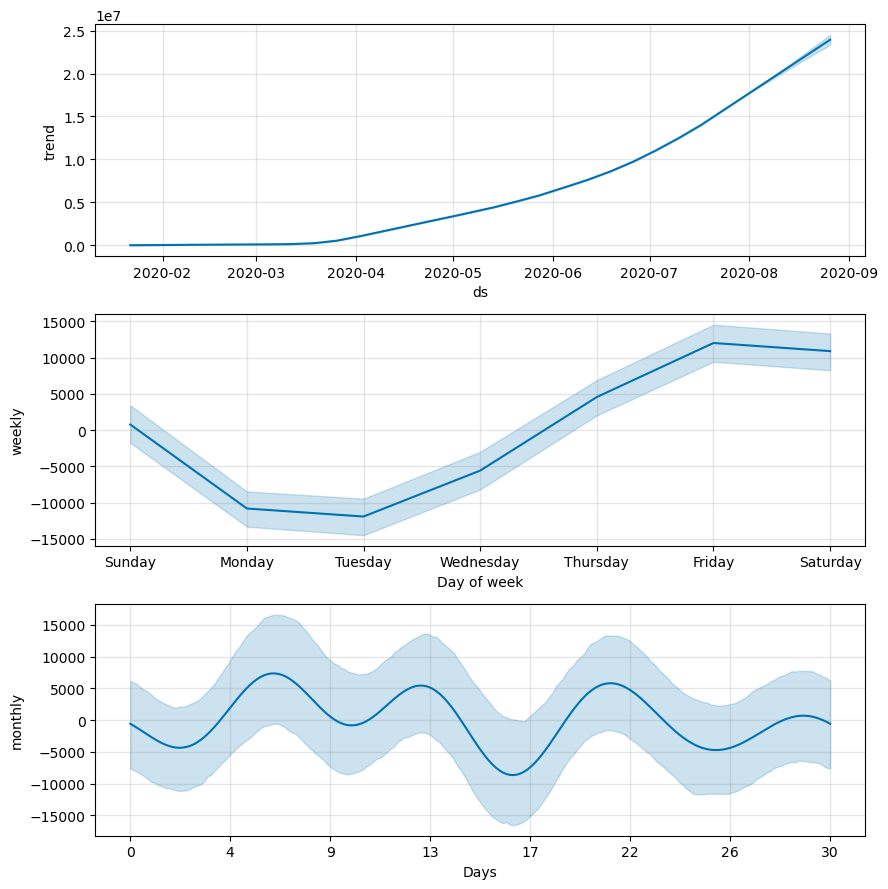

In [11]:
#Before you can start you need to rename the columns of the dataframe to ds for the timestamps and y for the target.
from prophet.plot import add_changepoints_to_plot

df_prophet= total.rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Make a future dataframe for X days
m_global = prophet.Prophet(changepoint_prior_scale=0.05,changepoint_range=0.95,
                      daily_seasonality=False, #We switch off the daily component as we only have cases per day and not per hour so all cases are reported at midnight each day. That makes a daily variation useless.
                      weekly_seasonality=True,
                     mcmc_samples=300)
# Add seasonlity
m_global.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m_global.fit(df_prophet)

# Make predictions
future_global = m_global.make_future_dataframe(periods=30, freq='D')

forecast_global = m_global.predict(future_global)

m_global.plot_components(forecast_global);

**Interpreting the trend plot**
- What we can see (in March 2020 but this will change over time) is that the model predicts a linear increase in cases into infinity.

**Interpreting the weekly plot**
- What is apparent is that the error margin is very large suggesting that there is no variation over the week. This would be expected as the spread of a virus is not affected by weekdays.

**Interpreting the monthly model**
- We have very little data to make any significant inference. However, the model suggests that more new cases occur around the middle of the month. This could potentially be an actual behaviour of the outbreak.

Text(87.59722222222221, 0.5, 'Confirmed Cases')

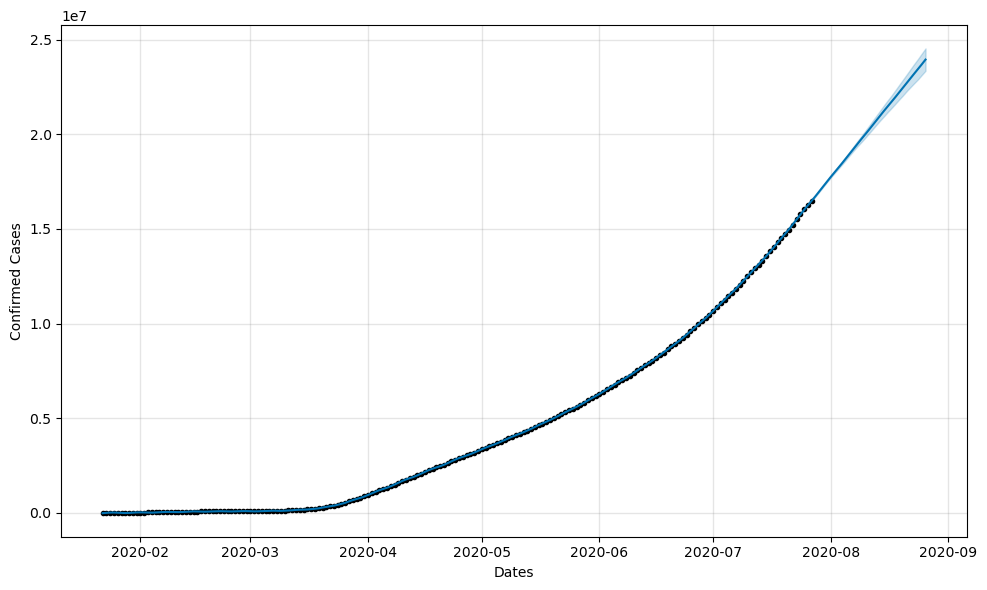

In [18]:
# This is what our prediction looks like.
fig =m_global.plot(forecast_global)
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')

In [22]:
# Rename columns for clarity
forecast_30_days = forecast_global[len(total):].loc[:, ['ds', 'yhat_lower', 'yhat_upper', 'yhat']].iloc[:30]
forecast_30_days = forecast_30_days.rename(columns={'ds': 'Date', 'yhat_lower': 'Lower Bound', 
                                                    'yhat_upper': 'Upper Bound', 'yhat': 'Predicted Deaths'})

pd.set_option('display.float_format', '{:.2f}'.format)
# Display the next 30 days forecast
forecast_30_days


,Date,Lower Bound,Upper Bound,Predicted Deaths
188,2020-07-28,16715592.84,16754277.43,16734460.75
189,2020-07-29,16964308.76,17007576.51,16985877.07
190,2020-07-30,17217671.85,17267712.22,17242467.06
191,2020-07-31,17469301.18,17527385.52,17498259.93
192,2020-08-01,17711277.26,17779492.70,17747086.49
193,2020-08-02,17944728.91,18031341.38,17987511.37
194,2020-08-03,18172113.26,18279666.22,18225730.94
195,2020-08-04,18407091.35,18541284.34,18472700.46
196,2020-08-05,18642746.13,18811001.53,18725488.45
197,2020-08-06,18888335.53,19081525.30,18981904.06


1. **`yhat`** – This is the predicted value for that date (the model’s forecast).  
2. **`yhat_lower`** – The lower bound of the confidence interval (e.g., 95% confidence interval). It represents the lowest expected value.  
3. **`yhat_upper`** – The upper bound of the confidence interval. It represents the highest expected value within the confidence range.  

- **`yhat`** gives the most probable forecasted value.  
- **`yhat_lower` and `yhat_upper`** help understand the **uncertainty** in predictions. If the confidence interval is wide, the forecast has high variability.  

